<a href="https://colab.research.google.com/github/Clarke-Henshaw-Miles/extra/blob/master/obsGW/C2submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2 - Sources of Gravitational Radiation

In this notebook we will look at some example of gravitational-wave signals, focusing on Compact Binary Coalescences (CBC), black holes and neutron stars in pairs.

## Imports
We will need some standard imports for this notebook:

In [1]:
from matplotlib import pyplot as plt
import numpy as np

And some that are gravitational-wave specific. Most are fairly easy to install "on-the-fly", with either [pip](https://pip.pypa.io/en/stable/), a convenient python package installer available by default on colab, or [conda](https://docs.conda.io/en/latest/), a more general package and environment manager. That last one is what Anaconda uses for instance.

Let's start with the [pycbc](https://pycbc.org/) package, "a software package used to explore astrophysical sources of gravitational waves". This is a software developed by scientists worldwide, some in the LIGO Virgo Kagar collaboration, some at Cardiff University, and actively used in modern Gravitational-wave analyses. To install it on Google colab, we can simply run:

In [2]:
! pip install -q lalsuite pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 48.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

And check that it worked with some version information:

In [3]:
import pycbc
pycbc.__version__

/usr/local/lib/python3.11/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


'2.7.2'

## Time domain CBC waveforms

There are many modules in the `pycbc` package. For this notebook we will use the `waveform` module, from which we will import the `get_td_waveform()`. `td` stands for "Time Domain".

In [4]:
from pycbc.waveform import get_td_waveform

There are many ways to (approximately) solve the gravitational-wave equations and compute the gravitational-wave signal. New ways are being develloped constantly, and most are rather complicated (take a look at the equations in section 9.4 of [this paper](https://arxiv.org/pdf/1310.1528.pdf)).
    
Here we are using the `SEOBNRv4` approximant, which describes the inspiral, merger, and ringdown phases of a binary black hole merger using a combination of analytical approximations and fits to numerical relativity simulations.

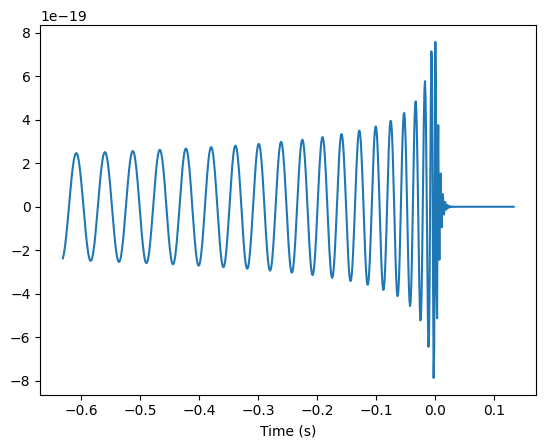

In [5]:
m1 = 38.9 # Solar masses
m2 = 31.6 # Solar masses

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m1,
                         mass2=m2,
                         delta_t=1./1024.,
                         f_lower=20)

plt.plot(hp.sample_times, hp)
plt.xlabel('Time (s)');

Notice that the time axis in seconds is set to be "0" at the peak of the waveform, that's a convention commonly used in gravitational-wave astronomy.

# **Question**
- Zoom in and add some `plt.axvline()` to mark out the _inspiral_ phase, the _merger_ phase and the _ringdown_ phase.

A note on [object-oriented programming](https://en.wikipedia.org/wiki/Object-oriented_programming). In python, almost everything is an _object_, with _methods_ that the user can call. Here is [a quick example](https://towardsdatascience.com/understand-o-o-p-in-python-with-one-article-bfa76f3ba48c). You have been using object oriented programming already, e.g.:

In [6]:
a=np.array([1,2])
a.mean()

1.5

In [7]:
# Printing some waveform info:
print('The waveform total duration is {}s, while the duration from start to peak is {}s'.format(hp.duration,-hp.start_time))

The waveform total duration is 0.765625s, while the duration from start to peak is 0.631462725s


It's often useful to take a look at the methods of an object and their documentation to see if there are some helping you accomplish what you are trying to do.

Notice that `get_td_waveform()` returns two polarizations of strain.  For now we'll just make use of the plus polarization. Let's generate the same waveform again, but this time change the `f_lower` parameter:

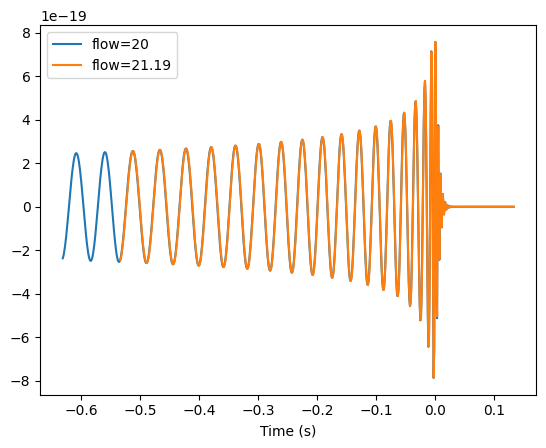

In [8]:
hp2, _ = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m1,
                         mass2=m2,
                         delta_t=1./1024.,
                         f_lower=21.19)

plt.plot(hp.sample_times, hp, label='flow=20')
plt.plot(hp2.sample_times, hp2, label='flow=21.19')
plt.xlabel('Time (s)')
plt.legend();

# **Questions**:
- Zoom towards the merger part of the waveform to see the differences.
- At what frequency does nature's signal start?
- What is `delta_t`, what is its effect, and why did we pick that value here?

Related to this last question, how long can those signals get? Let's take an extreme A+ LIGO example of an abnormaly light neutron star (1 solar mass):

Signal length is about 29.6 minutes.
CPU times: user 18.4 s, sys: 1.22 s, total: 19.6 s
Wall time: 19.7 s


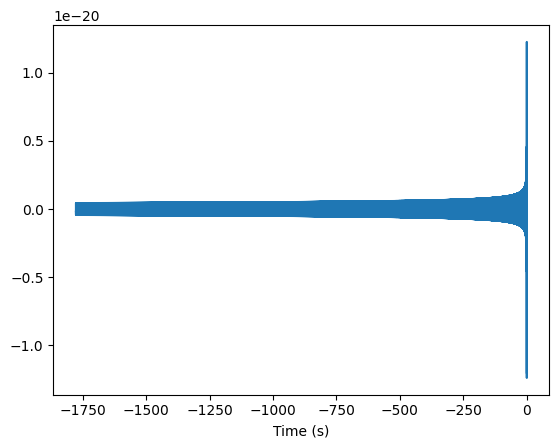

In [9]:
%%time

m1 = 1. # Solar masses
m2 = 1. # Solar masses

hp, hc = get_td_waveform(approximant="TaylorT4",
                         mass1=m1,
                         mass2=m2,
                         delta_t=1./8192.,
                         f_lower=10.)

plt.plot(hp.sample_times, hp)
plt.xlabel('Time (s)');

print("Signal length is about {:.1f} minutes.".format(hp.duration/60))

Note that we had to change the "approximant" for such a low-mass signal. `TaylorT4` is a simpler (and faster) approximant, and yet the signal generation time was much longer.

# **Question:**
- What do you think are the consequences of such a long signal for data analysis?
- Investigate the effects of changing the parameters, two examples are given below.
- Extra challenge: highlight degeneracies as mentioned in the weekly lecture by making plots of waveforms with different parameters being very similar over a range of time.
- This `TaylorT4` approximant only models the _inspiral_ phase of the signal. Use it to compare it agains the first signal you created, and see where the inspiral phase ends...

Varying the total mass:

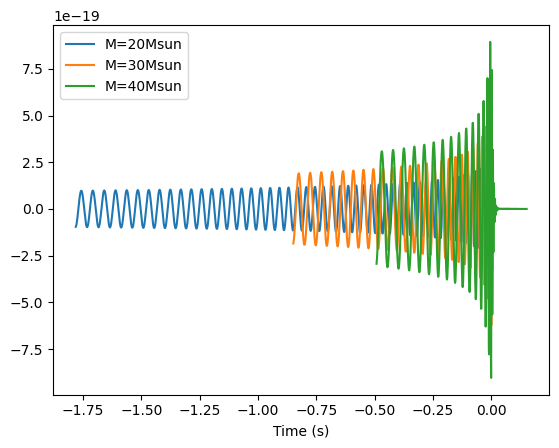

In [10]:
for m in [20,30,40]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=m,
                     mass2=m,
                     delta_t=1./1024.,
                     f_lower=20)
    plt.plot(hp.sample_times,hp,label='M='+str(m)+'Msun')

plt.xlabel('Time (s)')
plt.legend();


Varying the distance:

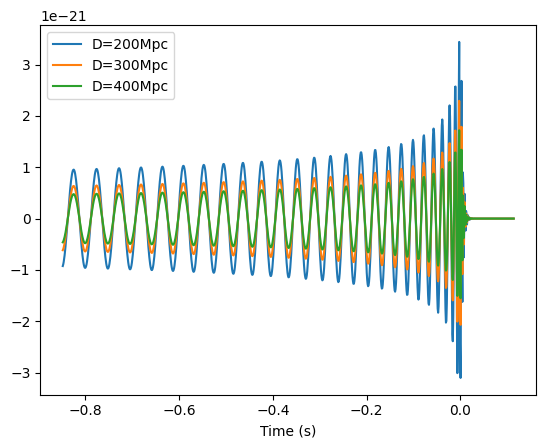

In [11]:
for d in [200,300,400]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                             mass1=30.,
                             mass2=30.,
                             delta_t=1./1024.,
                             distance=d,
                             f_lower=20)
    plt.plot(hp.sample_times,hp,label='D='+str(d)+'Mpc')

plt.xlabel('Time (s)')
plt.legend();


## Frequency domain CBC waveforms:

In [12]:
from pycbc.waveform import get_fd_waveform

And `fd` does stand for "Frequency Domain"...

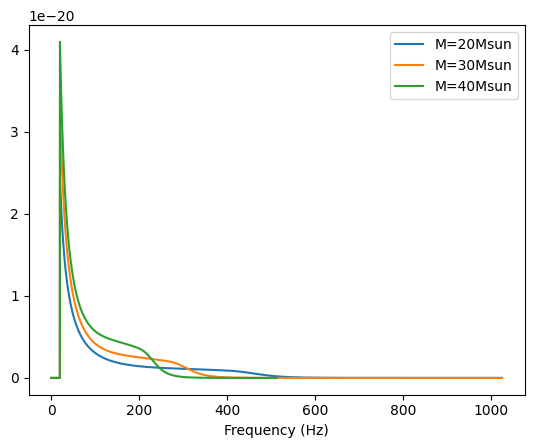

In [13]:
for m in [20,30,40]:
    hp_tilde, hc_tilde = get_fd_waveform(approximant="IMRPhenomPv2",
                                         mass1=m,
                                         mass2=m,
                                         delta_f=1./8.,
                                         f_lower=20)
    plt.plot(hp_tilde.sample_frequencies,np.abs(hp_tilde),label='M='+str(m)+'Msun')

plt.xlabel('Frequency (Hz)')
plt.legend();

`IMRPhenomPv2` is yet another "approximant", which has the particularity to be formulated directly in the time-domain.

# **Question**

- Why do the signals go down in amplitude as a function of frequency given that in the time domain, the amplitude looks larger at higher frequencies?

## Non-physical models

What if we don't know, or are not willing to assume, what source created a given gravitational-wave signals? How to we ensure we won't miss the Universe's surprises?

We can use models that are wave-like, but are not making assumptions, and instead help us measure significance, strength, frequencies of the signals. One such example is a sine-gaussian:

In [14]:
from scipy.signal import gausspulse

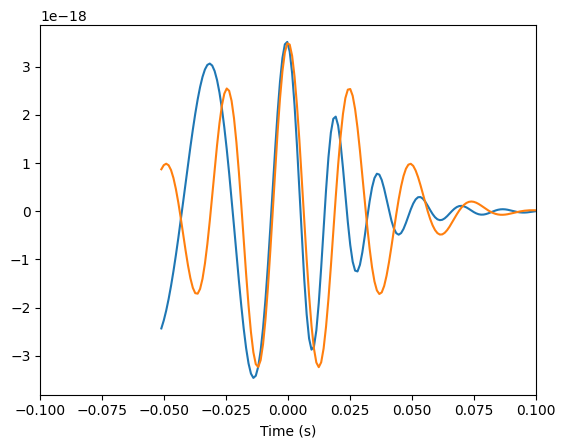

In [15]:
m1 = 150. # Solar masses
m2 = 150. # Solar masses

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m1,
                         mass2=m2,
                         delta_t=1./1024.,
                         f_lower=20)

plt.plot(hp.sample_times, hp)

plt.plot(hp.sample_times, gausspulse(hp.sample_times, fc=40, bw=0.3)*3.5e-18)
plt.xlim(-0.1,0.1)

plt.xlabel('Time (s)');

# **Questions**
- Try to match this very high-mass CBC signal with the sine-guassian agnostic model by changing its parameters.
- Would it be even better to add multiple such models?